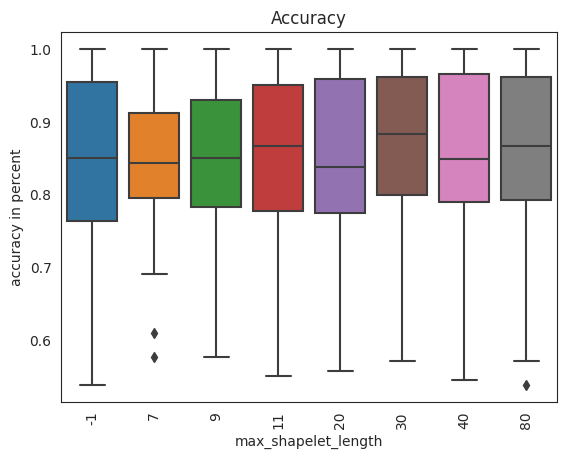

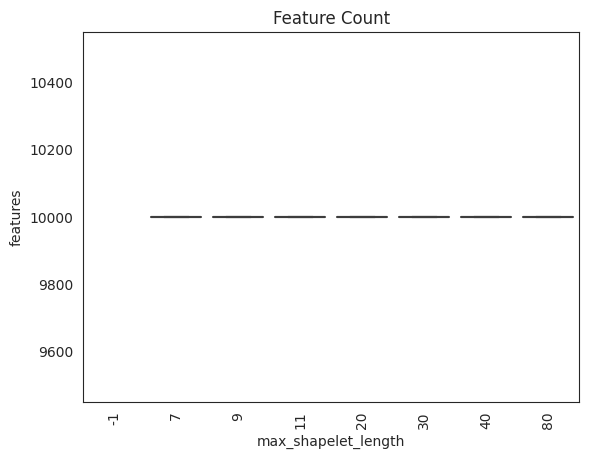

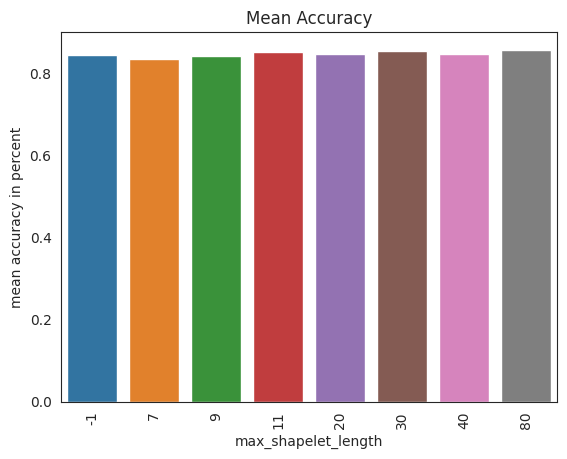

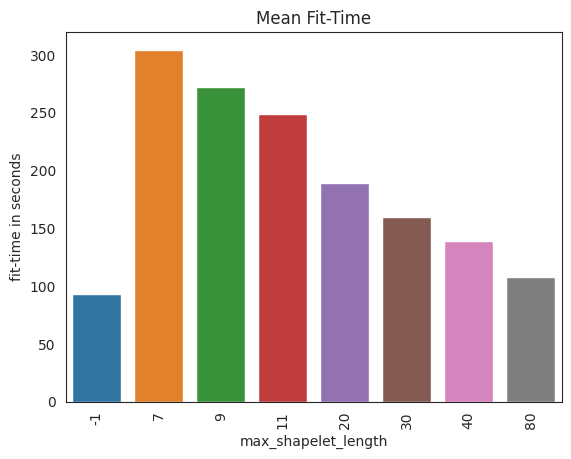

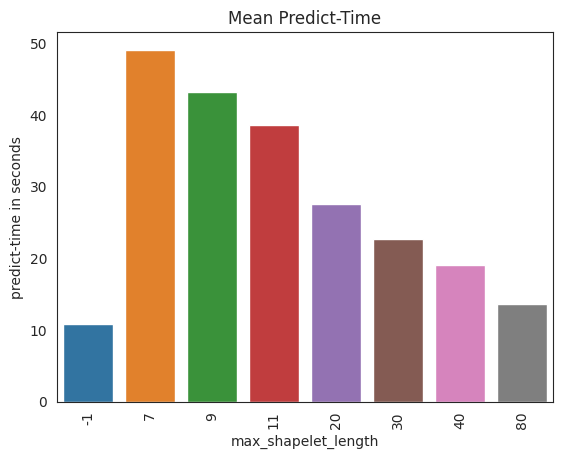

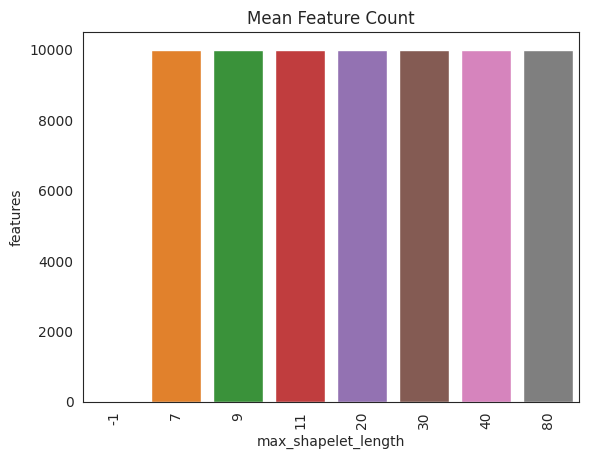

<Figure size 640x480 with 0 Axes>

In [21]:
import visualize
import pandas as pd

benchmark_name = "CSV_STC_DILATION_MAX_SHAPELET_LENGTH"
save_plots = True
base_column = 'max_shapelet_length'

all_results_raw = pd.read_csv("./results/" + benchmark_name + "/" + benchmark_name + ".csv", index_col=0)
all_results_raw[base_column] = all_results_raw[base_column].astype(int)
all_results_raw.sort_values(by=[base_column], inplace=True)
all_results_grouped = all_results_raw.groupby(base_column, dropna = False)
all_results = [group for _, group in all_results_grouped]

all_results_mean_raw = pd.read_csv("./results/" + benchmark_name + "/" + benchmark_name + "_av.csv", index_col=0)
all_results_mean_raw[base_column] = all_results_mean_raw[base_column].astype(int)
all_results_mean_raw.sort_values(by=[base_column], inplace=True)
all_results_mean_grouped = all_results_mean_raw.groupby(base_column, dropna = False)
all_results_mean = [group for _, group in all_results_mean_grouped]

visualize.boxplots(all_results, benchmark_name=benchmark_name, save_boxplots=save_plots, base_column=base_column)
visualize.barplots(all_results_mean, benchmark_name=benchmark_name, save_barcharts=save_plots, base_column=base_column)